[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Space-Dream-42/brainTumourProject/blob/main/Code/First_Model_UNet.ipynb)

## First approach: UNet  

In [1]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.datasets.vision import StandardTransform
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd 
from PIL import Image
import matplotlib.pyplot as plt 
%matplotlib inline 
import json
import os

import SimpleITK as sitk

from Dataset_Utils import BraTS_TrainingDataset
from Dataset_Utils import BraTS_TestDataset
from Dataset_Utils import plot_batch

In [2]:
torch.manual_seed(0)

## Data loading setup

In [3]:
# PATH
dataset_path = '/media/z/Ubuntu-Storage/BT_Segmentation_Project/Task01_BrainTumour/extracted/'

train_data = BraTS_TrainingDataset(dataset_path)
test_data = BraTS_TestDataset(dataset_path)

/media/z/Ubuntu-Storage/BT_Segmentation_Project/Task01_BrainTumour/extracted/imagesTr
/media/z/Ubuntu-Storage/BT_Segmentation_Project/Task01_BrainTumour/extracted/labelsTr
/media/z/Ubuntu-Storage/BT_Segmentation_Project/Task01_BrainTumour/extracted/imagesTs


In [4]:
trainloader = torch.utils.data.DataLoader(
    train_data, batch_size=2, shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(
    test_data, batch_size=2, shuffle=True, num_workers=0)

train_iter = iter(trainloader)
test_iter = iter(testloader)

sample_batch = train_iter.next()
print(sample_batch['image'].shape)
print(sample_batch['label'].shape)

torch.Size([2, 4, 155, 240, 240])
torch.Size([2, 155, 240, 240])


In [5]:
sample_batch = train_iter.next()
# plot_batch(sample_batch, num_rows=2, height=75)

## Create the model

In [6]:
# predefined models:
# https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/
# https://github.com/Project-MONAI/tutorials/blob/main/3d_segmentation/spleen_segmentation_3d.ipynb

# unet implementation
# https://github.com/milesial/Pytorch-UNet

In [7]:
# 2D unet
# -> predict for each slice
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=4, out_channels=1, init_features=32, pretrained=False)

Using cache found in /home/zemann/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [8]:
batch_slices = sample_batch['image'][:,:,70,:,:]
output = model(batch_slices)
output_array = torch.round(output[0]).detach().numpy()
output_array[0].shape

(240, 240)

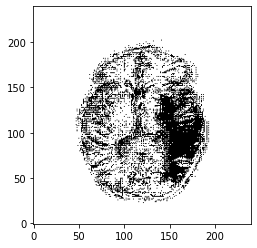

In [9]:
plt.imshow(output_array[0], cmap="gray", origin="lower")